In [ ]:
# To start 
# Install apache-drill

# I used :

# brew install apache-drill
# it's was saved on  /usr/local/Cellar/apache-drill

# cd /usr/local/Cellar/apache-drill/1.10.0/bin/ && ./drill-embedded

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
dfbusiness = pd.read_csv('/Users/emily/Downloads/dataset/business.csv')


In [3]:
dfbusinessall = dfbusiness
dfbusiness = dfbusiness[['business_id','review_count', 'stars',  'name', 'categories', 'state', 'city','address', 'latitude', 'longitude']]

In [4]:
states = ['AL','AK','AR','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MY','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
dfbusiness=dfbusiness[dfbusiness['state'].isin(['AL','AK','AR','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MY','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY'])]
dfbusiness

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude
0,YDf95gJZaq05wvo7hTQbbQ,17,2.0,Richmond Town Square,"[u'Shopping', u'Shopping Centers']",OH,Richmond Heights,691 Richmond Rd,41.541716,-81.493116
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976
7,fEylCY3UEH8YJ0Xa7lu6lA,16,2.5,Auto Bathouse,"[u'Automotive', u'Oil Change Stations', u'Car ...",PA,Pittsburgh,5770 Butler St,40.485939,-79.943727
8,kFtuYklkAIlmYw8RZAieGw,7,5.0,JAB Jewelry Designs,"[u'Jewelry Repair', u'Gold Buyers', u'Local Se...",PA,McMurray,3220 Washington Rd,40.290498,-80.110021
10,N9BN9ldVl1FNzcB9_eAstw,13,4.5,Red Rock Bowling UYE Part 2,"[u'Bowling', u'Active Life']",NV,Las Vegas,11022 W Charleston Blvd,36.159098,-115.337915
14,SDMRxmcKPNt1AHPBKqO64Q,21,2.0,Applebee's,"[u'Burgers', u'Bars', u'Restaurants', u'Sports...",NC,Matthews,9616 E Independence Blvd,35.135196,-80.714683
15,iFEiMJoEqyB9O8OUNSdLzA,3,3.0,China Garden,"[u'Chinese', u'Restaurants']",NC,Stanley,190 E Dallas Rd,35.355085,-81.087268
17,jqp5TibmgJZVFKHTp3XfqQ,25,3.0,Alpaul Automobile Wash,"[u'Car Wash', u'Automotive', u'Auto Detailing']",OH,Cleveland,2128 Warrensville Ctr Rd,41.501820,-81.536776
18,1cLXGXThDYZ5WK_KpBLtkw,162,4.0,Koko Bakery,"[u'Food', u'Bakeries', u'Coffee & Tea']",OH,Cleveland,3710 Payne Ave,41.509408,-81.662162
19,BmSJ6C7Y9s3tHotRetVbmA,3,3.5,U.S. Bank,"[u'Financial Services', u'Banks & Credit Unions']",NV,Las Vegas,2385 E Windmill Ln,36.040413,-115.119104


In [5]:
food_list = []
for i in dfbusiness['categories']:
    if 'Food' in i or 'Restaurants' in i:
        food_list.append(i)
dfbusiness=dfbusiness[dfbusiness['categories'].isin(food_list)]

In [6]:
dfbusiness

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976
14,SDMRxmcKPNt1AHPBKqO64Q,21,2.0,Applebee's,"[u'Burgers', u'Bars', u'Restaurants', u'Sports...",NC,Matthews,9616 E Independence Blvd,35.135196,-80.714683
15,iFEiMJoEqyB9O8OUNSdLzA,3,3.0,China Garden,"[u'Chinese', u'Restaurants']",NC,Stanley,190 E Dallas Rd,35.355085,-81.087268
18,1cLXGXThDYZ5WK_KpBLtkw,162,4.0,Koko Bakery,"[u'Food', u'Bakeries', u'Coffee & Tea']",OH,Cleveland,3710 Payne Ave,41.509408,-81.662162
21,HmI9nhgOkrXlUr6KZGZZew,15,3.0,Rocky's,"[u'Sandwiches', u'Restaurants', u'Italian', u'...",PA,Pittsburgh,4759 Liberty Ave,40.461350,-79.948113
31,TXiEgINSZ75d3EtvLvkc4Q,45,3.0,Red Lobster,"[u'Restaurants', u'Seafood', u'American (Tradi...",WI,Madison,4502 East Towne Blvd,43.128034,-89.307157
36,PV9CdNFDOX4_zWm3Sy3W8g,117,3.0,Quaker Steak & Lube,"[u'Burgers', u'Chicken Wings', u'Bars', u'Rest...",WI,Middleton,2259 Deming Way,43.097806,-89.519217
56,-2q4dnUw0gGJniGW2aPamQ,4,2.0,Fiesta Ranchera,"[u'Restaurants', u'Mexican']",IL,Champaign,1805 S Neil St,40.094068,-88.245785
58,LDMCrFlGIFUN6L-FEFgzWg,12,3.0,El Pollo Loco,"[u'Restaurants', u'American (Traditional)', u'...",NV,Las Vegas,2400 E Lake Mead Blvd,36.196203,-115.116799
64,QTH_XGh4rWYdd0fTW-tUDw,7,3.5,Baja Fresh Mexican Grill,"[u'Mexican', u'Restaurants']",NV,Las Vegas,4190 S Rainbow Blvd,36.112519,-115.242605


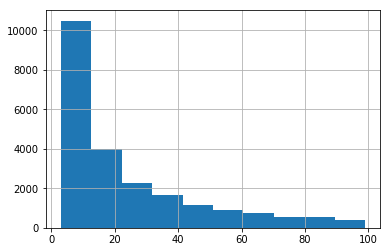

In [7]:
rev_count = dfbusiness[dfbusiness['review_count']<100]
rev_count.review_count.hist()

In [8]:
dfcheckin = pd.read_csv('/Users/emily/Downloads/dataset/checkin_binned.csv')
dfcheckin.head()

,business_id,Mon_Morning,Mon_Afternoon,Mon_Night,Mon_Late,Tues_Morning,Tues_Afternoon,Tues_Night,Tues_Late,Weds_Morning,...,Fri_Night,Fri_Late,Sat_Morning,Sat_Afternoon,Sat_Night,Sat_Late,Sun_Morning,Sun_Afternoon,Sun_Night,Sun_Late
0,7KPBkxAOEtb3QeIL9PEErg,1,2,4,0,0,5,7,1,3,...,8,3,1,11,8,4,1,3,10,6
1,kREVIrSBbtqBhIYkTccQUg,0,1,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
2,tJRDll5yqpZwehenzE2cSg,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,nhZ1HGWD8lMErdn3FuWuTQ,0,1,6,1,0,1,6,1,0,...,3,2,0,1,6,3,0,2,2,2
4,vDoXZGE7p6xAkKQ0XQPvoA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
dfcheckin = pd.read_csv('/Users/emily/Downloads/checkedin.csv')
dfcheckin.head()

,business_id,Morning,Afternoon,Night,Late
0,7KPBkxAOEtb3QeIL9PEErg,8,32,52,21
1,kREVIrSBbtqBhIYkTccQUg,0,4,3,0
2,tJRDll5yqpZwehenzE2cSg,0,2,0,2
3,nhZ1HGWD8lMErdn3FuWuTQ,0,5,26,14
4,vDoXZGE7p6xAkKQ0XQPvoA,0,1,1,0


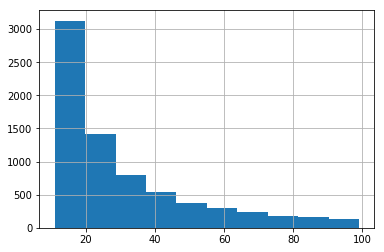

In [10]:
rev_count = dfcheckin[dfcheckin['Morning']>10]
rev_count = rev_count[rev_count['Morning']<100]
rev_count.Morning.hist()

In [11]:
df_both = pd.concat([dfbusiness, dfcheckin], axis=1, join='inner')
df_both.head()

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,business_id,Morning,Afternoon,Night,Late
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,kREVIrSBbtqBhIYkTccQUg,0,4,3,0
14,SDMRxmcKPNt1AHPBKqO64Q,21,2.0,Applebee's,"[u'Burgers', u'Bars', u'Restaurants', u'Sports...",NC,Matthews,9616 E Independence Blvd,35.135196,-80.714683,GbSKygYKUy13yoZZdVxJuQ,0,3,5,0
15,iFEiMJoEqyB9O8OUNSdLzA,3,3.0,China Garden,"[u'Chinese', u'Restaurants']",NC,Stanley,190 E Dallas Rd,35.355085,-81.087268,FQM4pVt1jeZcBGLIsXhXNA,0,1,19,15
18,1cLXGXThDYZ5WK_KpBLtkw,162,4.0,Koko Bakery,"[u'Food', u'Bakeries', u'Coffee & Tea']",OH,Cleveland,3710 Payne Ave,41.509408,-81.662162,yEWrdUczj1_9KTUJEVfIIg,0,1,7,3
21,HmI9nhgOkrXlUr6KZGZZew,15,3.0,Rocky's,"[u'Sandwiches', u'Restaurants', u'Italian', u'...",PA,Pittsburgh,4759 Liberty Ave,40.461350,-79.948113,vl02XdFVoXC-s_Y4WVvL-g,0,2,2,0


In [12]:
df_both

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,business_id,Morning,Afternoon,Night,Late
1,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,kREVIrSBbtqBhIYkTccQUg,0,4,3,0
14,SDMRxmcKPNt1AHPBKqO64Q,21,2.0,Applebee's,"[u'Burgers', u'Bars', u'Restaurants', u'Sports...",NC,Matthews,9616 E Independence Blvd,35.135196,-80.714683,GbSKygYKUy13yoZZdVxJuQ,0,3,5,0
15,iFEiMJoEqyB9O8OUNSdLzA,3,3.0,China Garden,"[u'Chinese', u'Restaurants']",NC,Stanley,190 E Dallas Rd,35.355085,-81.087268,FQM4pVt1jeZcBGLIsXhXNA,0,1,19,15
18,1cLXGXThDYZ5WK_KpBLtkw,162,4.0,Koko Bakery,"[u'Food', u'Bakeries', u'Coffee & Tea']",OH,Cleveland,3710 Payne Ave,41.509408,-81.662162,yEWrdUczj1_9KTUJEVfIIg,0,1,7,3
21,HmI9nhgOkrXlUr6KZGZZew,15,3.0,Rocky's,"[u'Sandwiches', u'Restaurants', u'Italian', u'...",PA,Pittsburgh,4759 Liberty Ave,40.461350,-79.948113,vl02XdFVoXC-s_Y4WVvL-g,0,2,2,0
31,TXiEgINSZ75d3EtvLvkc4Q,45,3.0,Red Lobster,"[u'Restaurants', u'Seafood', u'American (Tradi...",WI,Madison,4502 East Towne Blvd,43.128034,-89.307157,KH6AnamatNNCKszLpopjOg,0,5,40,1
36,PV9CdNFDOX4_zWm3Sy3W8g,117,3.0,Quaker Steak & Lube,"[u'Burgers', u'Chicken Wings', u'Bars', u'Rest...",WI,Middleton,2259 Deming Way,43.097806,-89.519217,P2zXpZN7UTDDM9_Q7Bs8Jg,0,30,24,2
56,-2q4dnUw0gGJniGW2aPamQ,4,2.0,Fiesta Ranchera,"[u'Restaurants', u'Mexican']",IL,Champaign,1805 S Neil St,40.094068,-88.245785,SNNrb5T4dn3DMq410HIpxw,1,22,78,41
58,LDMCrFlGIFUN6L-FEFgzWg,12,3.0,El Pollo Loco,"[u'Restaurants', u'American (Traditional)', u'...",NV,Las Vegas,2400 E Lake Mead Blvd,36.196203,-115.116799,#NAME?,0,7,33,14
64,QTH_XGh4rWYdd0fTW-tUDw,7,3.5,Baja Fresh Mexican Grill,"[u'Mexican', u'Restaurants']",NV,Las Vegas,4190 S Rainbow Blvd,36.112519,-115.242605,7sakqP2av046jujj-ERHhg,5,111,85,16


In [13]:
df_schools = pd.read_csv("postscndryunivsrvy2013dirinfo.csv")

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    miles = 3956 * c
    #km = 6367 * c
    return miles # km

def convert_f64(column): return column.astype(np.float64)



In [14]:

def stepJoin(df1,df2,nsteps,nrows,filter=10):
    results_df=[]
    for i in range(nsteps):
        df_joined =df1[(i*nrows):((i+1)*nrows)].merge(df2)
        df_joined['longitude'] = convert_f64(df_joined['longitude'])
        df_joined['latitude'] = convert_f64(df_joined['latitude'])
        df_joined['LONGITUD'] = convert_f64(df_joined['LONGITUD'])
        df_joined['LATITUDE'] = convert_f64(df_joined['LATITUDE'])
        df_joined['dist'] = haversine_np(df_joined['longitude'],df_joined['latitude'],df_joined['LONGITUD'],df_joined['LATITUDE'])
        df_filtered = df_joined[df_joined['dist']<10]
        results_df.append(df_filtered)
    return pd.concat(results_df)



In [15]:
df_both['tmp'] =1
df_schools['tmp'] =1
resdf = stepJoin(df_both,df_schools,2,1000)


In [16]:
resdf

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,...,NECTA,F1SYSTYP,F1SYSNAM,F1SYSCOD,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,dist
2823,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Commercial College of Asheboro Inc.,301130,37119,Mecklenburg County,3712,-80.740616,35.327013,6.224416
2835,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,North Carolina Community College System,137020,37119,Mecklenburg County,3709,-80.829796,35.217774,5.125621
2864,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,2,,-2,37119,Mecklenburg County,3712,-80.854842,35.243384,6.380623
2892,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,University of North Carolina,137030,37119,Mecklenburg County,3712,-80.735790,35.306834,4.843249
2907,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,2,,-2,37119,Mecklenburg County,3709,-80.832227,35.188929,6.072610
2922,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,EEG Inc.,301640,37119,Mecklenburg County,3709,-80.700592,35.119797,8.413965
4934,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Bradford Schools Inc.,300550,37119,Mecklenburg County,3709,-80.822384,35.213048,4.824275
5510,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Carolinas HealthCare System,137010,37119,Mecklenburg County,3709,-80.838535,35.200295,6.003572
6017,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,2,,-2,37119,Mecklenburg County,3712,-80.802527,35.242999,3.440732
6081,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Johnson & Wales University,200780,37119,Mecklenburg County,3712,-80.850900,35.232940,6.148840


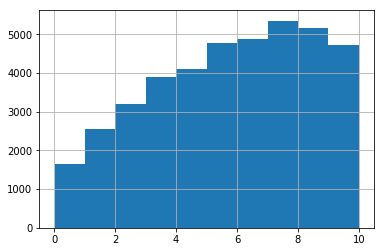

In [17]:
resdf.dist.hist()

In [45]:
ma_only = resdf[resdf['state'] =='NC']

In [46]:
ma_only

,business_id,review_count,stars,name,categories,state,city,address,latitude,longitude,...,NECTA,F1SYSTYP,F1SYSNAM,F1SYSCOD,COUNTYCD,COUNTYNM,CNGDSTCD,LONGITUD,LATITUDE,dist
2823,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Commercial College of Asheboro Inc.,301130,37119,Mecklenburg County,3712,-80.740616,35.327013,6.224416
2835,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,North Carolina Community College System,137020,37119,Mecklenburg County,3709,-80.829796,35.217774,5.125621
2864,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,2,,-2,37119,Mecklenburg County,3712,-80.854842,35.243384,6.380623
2892,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,University of North Carolina,137030,37119,Mecklenburg County,3712,-80.735790,35.306834,4.843249
2907,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,2,,-2,37119,Mecklenburg County,3709,-80.832227,35.188929,6.072610
2922,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,EEG Inc.,301640,37119,Mecklenburg County,3709,-80.700592,35.119797,8.413965
4934,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Bradford Schools Inc.,300550,37119,Mecklenburg County,3709,-80.822384,35.213048,4.824275
5510,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Carolinas HealthCare System,137010,37119,Mecklenburg County,3709,-80.838535,35.200295,6.003572
6017,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,2,,-2,37119,Mecklenburg County,3712,-80.802527,35.242999,3.440732
6081,mLwM-h2YhXl2NCgdS84_Bw,4,4.5,South Florida Style Chicken & Ribs,"[u'Food', u'Soul Food', u'Convenience Stores',...",NC,Charlotte,2824 Milton Rd,35.236870,-80.741976,...,-2,1,Johnson & Wales University,200780,37119,Mecklenburg County,3712,-80.850900,35.232940,6.148840


In [47]:
df_needed = ma_only[['name','state','city','F1SYSNAM','review_count','stars','Morning','Afternoon','Night','Late','dist']]
df_needed.head()

,name,state,city,F1SYSNAM,review_count,stars,Morning,Afternoon,Night,Late,dist
2823,South Florida Style Chicken & Ribs,NC,Charlotte,Commercial College of Asheboro Inc.,4,4.5,0,4,3,0,6.224416
2835,South Florida Style Chicken & Ribs,NC,Charlotte,North Carolina Community College System,4,4.5,0,4,3,0,5.125621
2864,South Florida Style Chicken & Ribs,NC,Charlotte,,4,4.5,0,4,3,0,6.380623
2892,South Florida Style Chicken & Ribs,NC,Charlotte,University of North Carolina,4,4.5,0,4,3,0,4.843249
2907,South Florida Style Chicken & Ribs,NC,Charlotte,,4,4.5,0,4,3,0,6.072610


In [48]:
df_cluster = df_needed[df_needed.columns[4:11]]
df_cluster.head()

,review_count,stars,Morning,Afternoon,Night,Late,dist
2823,4,4.5,0,4,3,0,6.224416
2835,4,4.5,0,4,3,0,5.125621
2864,4,4.5,0,4,3,0,6.380623
2892,4,4.5,0,4,3,0,4.843249
2907,4,4.5,0,4,3,0,6.072610


In [49]:
data_array = df_cluster.as_matrix()

In [58]:
kmeans = KMeans(n_clusters=7).fit(data_array)

In [50]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(data_array)
    label = kmeans.labels_
    sil_coeff = silhouette_score(data_array, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.850753145853
For n_clusters=3, The Silhouette Coefficient is 0.595802346699
For n_clusters=4, The Silhouette Coefficient is 0.615541259089
For n_clusters=5, The Silhouette Coefficient is 0.634612486318
For n_clusters=6, The Silhouette Coefficient is 0.607638045222
For n_clusters=7, The Silhouette Coefficient is 0.613005094358
For n_clusters=8, The Silhouette Coefficient is 0.535072540168
For n_clusters=9, The Silhouette Coefficient is 0.549533505328
For n_clusters=10, The Silhouette Coefficient is 0.55290139297


In [59]:
labels = kmeans.labels_
sse = kmeans.inertia_
center = kmeans.cluster_centers_

print labels


[1 1 1 ..., 4 4 4]


In [60]:
df_needed['cluster'] = labels
df_needed

C:\Users\emily\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,state,city,F1SYSNAM,review_count,stars,Morning,Afternoon,Night,Late,dist,cluster
2823,South Florida Style Chicken & Ribs,NC,Charlotte,Commercial College of Asheboro Inc.,4,4.5,0,4,3,0,6.224416,1
2835,South Florida Style Chicken & Ribs,NC,Charlotte,North Carolina Community College System,4,4.5,0,4,3,0,5.125621,1
2864,South Florida Style Chicken & Ribs,NC,Charlotte,,4,4.5,0,4,3,0,6.380623,1
2892,South Florida Style Chicken & Ribs,NC,Charlotte,University of North Carolina,4,4.5,0,4,3,0,4.843249,1
2907,South Florida Style Chicken & Ribs,NC,Charlotte,,4,4.5,0,4,3,0,6.072610,1
2922,South Florida Style Chicken & Ribs,NC,Charlotte,EEG Inc.,4,4.5,0,4,3,0,8.413965,1
4934,South Florida Style Chicken & Ribs,NC,Charlotte,Bradford Schools Inc.,4,4.5,0,4,3,0,4.824275,1
5510,South Florida Style Chicken & Ribs,NC,Charlotte,Carolinas HealthCare System,4,4.5,0,4,3,0,6.003572,1
6017,South Florida Style Chicken & Ribs,NC,Charlotte,,4,4.5,0,4,3,0,3.440732,1
6081,South Florida Style Chicken & Ribs,NC,Charlotte,Johnson & Wales University,4,4.5,0,4,3,0,6.148840,1


[136294689.92639887, 68603976.521921113, 52948470.164247148, 39009473.684088498, 30782716.7456095, 25412211.197165005, 20463230.679633498, 16726636.703436309, 14217759.098220583, 12504646.70367758, 11116304.559659686, 9913047.1325899456, 8899277.8690142483, 8149393.8954380658, 7257190.0839989223, 6706310.4251622707, 6220751.1726514632, 5712710.4689683812, 5303410.51310312, 4943377.8869723706, 4639058.5751451403, 4353823.6853740765, 4111615.291980152, 3734501.9416157664, 3520873.6532394839, 3290968.7745048329, 3113506.7541441857, 2961056.0947764083, 2794681.2191814263, 2678836.2734041284, 2539965.1878069723, 2389536.1270284308, 2278286.3763426803, 2185334.1713453177, 2041822.080976238, 1976667.7399327182, 1897855.0138726262, 1768872.7120672492, 1718821.3283106962, 1655891.1619076657, 1587804.0951158144, 1504502.0140830469, 1462958.7787879491, 1419579.1142186343, 1376479.7499185205, 1306821.0913653893, 1273978.3768304542, 1217576.6475911126, 1183640.9655646665]


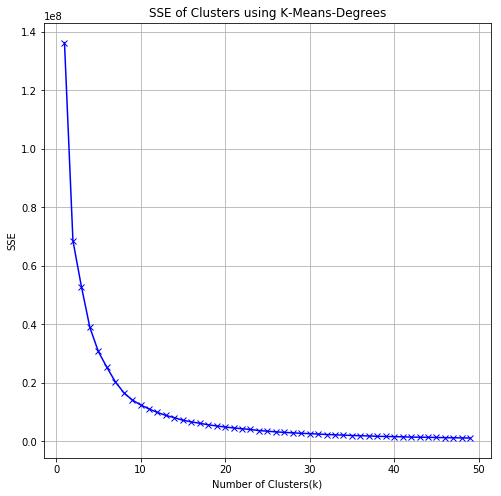

In [57]:
##SSE graph 
sse_values = []
for k in range(1,50):
    kmeans = KMeans(n_clusters = k, max_iter = 300, random_state = 1, n_init = 100)
    kmeans.fit(data_array)
    sse_values.append(kmeans.inertia_)
print (sse_values)

plt.figure(figsize=(8,8))
plt.plot(range(1,50),sse_values, 'xb-')
plt.title('SSE of Clusters using K-Means-Degrees')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('SSE')
plt.grid()
plt.show()

In [40]:
from sklearn.neighbors import NearestNeighbors
metric = 'euclidean'
nbrs = NearestNeighbors(n_neighbors = 10, algorithm = 'brute', metric = metric).fit(data_array)
distances, indices = nbrs.kneighbors(data_array)
dist_to_k = distances[:,k-1]
dist_to_k = np.sort(dist_to_k)

plt.figure(figsize= (8,8))
for k in [2,3,4,5,6,7,8,9,10]:
    dist_to_k = distances[:,k-1]
    dist_to_k = np.sort(dist_to_k)
    plt.plot(range(1,len(dist_to_k)+1),dist_to_k, label = '%dth NN'%k)
plt.title('Distances to kth nearest neighbor (%s)'%(metric))
plt.xlabel('Points sorted according to distance kth nearest neighbor-Degrees')
plt.ylabel('kth nearest neighbor distance')
plt.xlim(0,60)
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

NameError: name 'k' is not defined